In [2]:
dataset = sm.datasets.get_rdataset("clouds", package = "HSAUR")
df = dataset.data
df.tail()

,seeding,time,sne,cloudcover,prewetness,echomotion,rainfall
19,yes,59,3.40,6.5,0.142,stationary,5.45
20,yes,65,3.15,3.1,0.073,moving,2.02
21,no,68,3.15,2.6,0.136,moving,0.82
22,yes,82,4.01,8.3,0.123,moving,1.09
23,no,83,4.65,7.4,0.168,moving,0.28


##### 1.1 선형모형
- 종속변수 rainfall을 다른 변수로 예측하는 선형 모형을 만들고 결정계수로 성능을 구하여라

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [20]:
formula_simple = "rainfall ~ " + "seeding + scale(time) + scale(sne) + scale(cloudcover)\
                + scale(prewetness) + echomotion"

In [21]:
model1 = sm.OLS.from_formula(formula_simple, data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1.773
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.165
Time:                        09:19:50   Log-Likelihood:                -54.936
No. Observations:                  24   AIC:                             123.9
Df Residuals:                      17   BIC:                             132.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### 1.3 seeding이 영향을 끼치는지?
- ANOVA분석으로 검정, 유의수준 10%

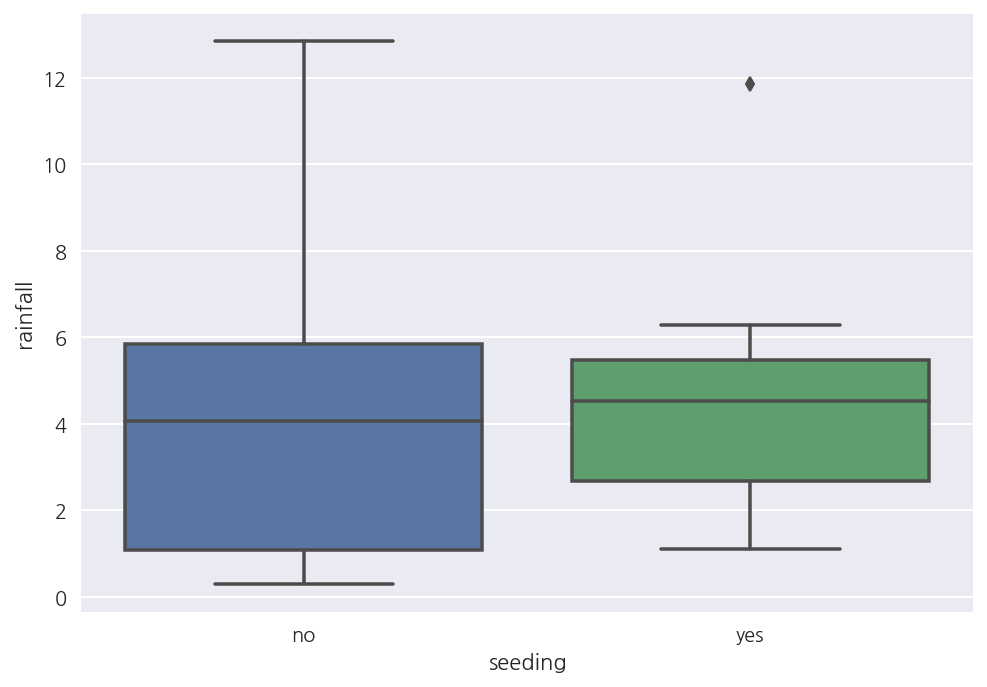

In [22]:
sns.boxplot(x = "seeding", y = "rainfall", data=df)
plt.show()

In [23]:
model = sm.OLS.from_formula("rainfall ~ seeding", data=df)
result = model.fit()

In [25]:
sm.stats.anova_lm(result)
# R-squared 값이 0인가 아닌가를 테스트 하는게 핵심
# F-test
# 답 : ANOVA 분석의 유의확률은 72%이므로 seeding은 영향을 미치지 않는다.

,df,sum_sq,mean_sq,F,PR(>F)
seeding,1.0,1.283438,1.283438,0.127733,0.7242
Residual,22.0,221.051458,10.047794,NaN,NaN


##### 1.4 seeding과 다른 변수의 상호작용(interrection) 확인
- 위 단순 모형에 seeding과 다른 변수의 상호작용을 추가하여 변수 중 seeding과의 상호작용이 유의한 변수를 찾아라

In [27]:
# seeding - time 상호작용
# 유의함
model = sm.OLS.from_formula("rainfall ~ seeding : scale(time)", data=df)
result = model.fit()
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
seeding:scale(time),2.0,67.917706,33.958853,4.618242,0.021763
Residual,21.0,154.417189,7.353199,NaN,NaN


In [28]:
# seeding - sne 상호작용
model = sm.OLS.from_formula("rainfall ~ seeding : scale(sne)", data=df)
result = model.fit()
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
seeding:scale(sne),2.0,42.507615,21.253808,2.481992,0.107747
Residual,21.0,179.827281,8.563204,NaN,NaN


In [29]:
# seeding - cloudcover 상호작용
# 유의함
model = sm.OLS.from_formula("rainfall ~ seeding : scale(cloudcover)", data=df)
result = model.fit()
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
seeding:scale(cloudcover),2.0,71.621067,35.810533,4.989729,0.016867
Residual,21.0,150.713829,7.176849,NaN,NaN


In [34]:
# seeding - echomotion 상호작용
model = sm.OLS.from_formula("rainfall ~ seeding : echomotion", data=df)
result = model.fit()
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
seeding:echomotion,3.0,30.653819,10.217940,1.06614,0.385683
Residual,20.0,191.681077,9.584054,NaN,NaN


In [35]:
# seeding - prewetness 상호작용
model = sm.OLS.from_formula("rainfall ~ seeding : scale(prewetness)", data=df)
result = model.fit()
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
seeding:scale(prewetness),2.0,17.940774,8.970387,0.921642,0.413369
Residual,21.0,204.394122,9.733053,NaN,NaN


In [38]:
# 이렇게 찾아주는게 좋다
formula_interact = "rainfall ~ " + "seeding*(scale(time) + scale(sne) + scale(cloudcover)\
                + scale(prewetness) + echomotion)"

In [39]:
model_interact = sm.OLS.from_formula(formula_interact, data = df)
result_interact = model_interact.fit()
print(result_interact.summary())
# 범수형 자료형과 실수형 자료형의 상호작용
# -> 기울기가 달라짐

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     3.095
Date:                Sat, 23 May 2020   Prob (F-statistic):             0.0321
Time:                        09:37:56   Log-Likelihood:                -44.630
No. Observations:                  24   AIC:                             113.3
Df Residuals:                      12   BIC:                             127.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [40]:
# 최종적으로 유의한 것들만 모으기
formula_last = "rainfall ~ scale(time) + seeding:scale(sne)"

In [41]:
model_last = sm.OLS.from_formula(formula_last, data = df)
result_last = model_last.fit()
print(result_last.summary())
# seeding을 안했을 경우 p-value : 0.786
# coef값이 0.2222는 믿을수 없는 값임 -> 0이라고 생각

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     4.090
Date:                Sat, 23 May 2020   Prob (F-statistic):             0.0204
Time:                        09:43:15   Log-Likelihood:                -55.028
No. Observations:                  24   AIC:                             118.1
Df Residuals:                      20   BIC:                             122.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### 2. 다항회귀

In [44]:
dataset = sm.datasets.get_rdataset("Salaries", package = "carData")
df = dataset.data[["yrs.since.phd", "salary"]]
df = df.rename(columns = {"yrs.since.phd": "experience"})
df.tail()

,experience,salary
392,33,103106
393,31,150564
394,42,101738
395,25,95329
396,8,81035


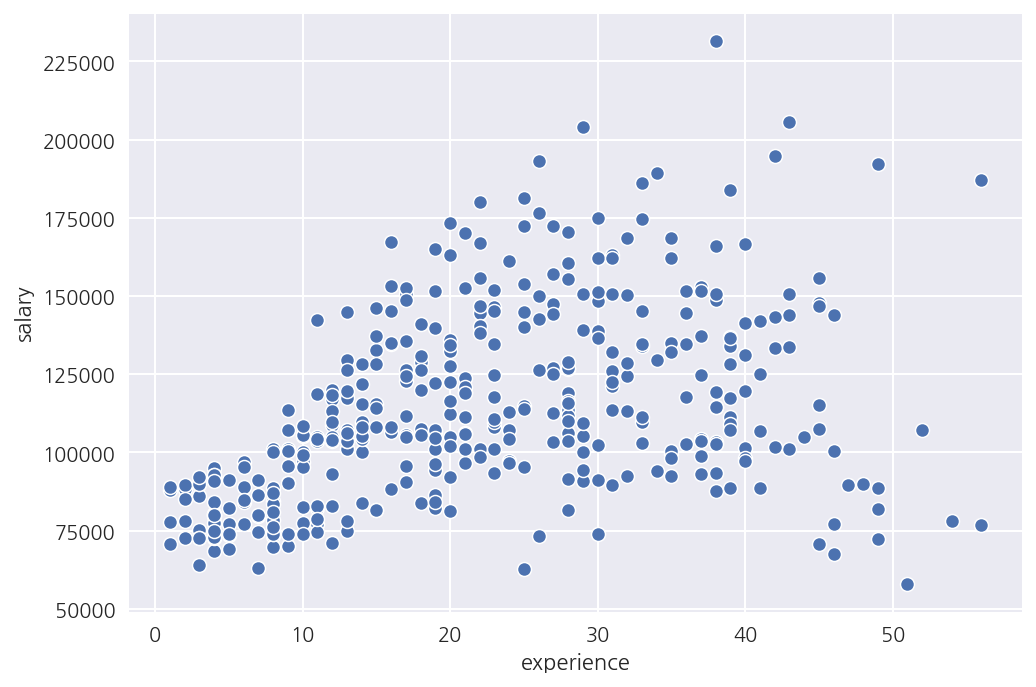

In [45]:
sns.scatterplot(x = "experience", y = "salary", data = df)
plt.show()

In [58]:
model = sm.OLS.from_formula("salary ~ experience", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     84.23
Date:                Sat, 23 May 2020   Prob (F-statistic):           2.50e-18
Time:                        10:00:40   Log-Likelihood:                -4620.9
No. Observations:                 397   AIC:                             9246.
Df Residuals:                     395   BIC:                             9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.172e+04   2765.792     33.162      0.0

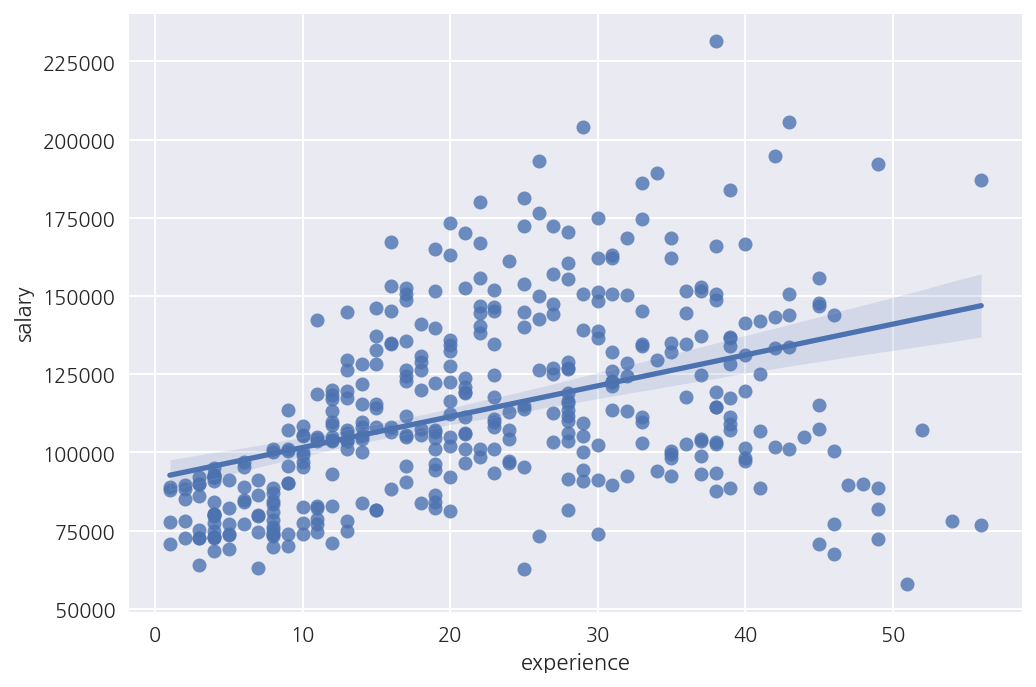

In [50]:
sns.regplot(x = "experience", y = "salary", data = df)
plt.show()

In [63]:
model2 = sm.OLS.from_formula("salary ~ experience + I(experience**2)", data=df)
result2 = model2.fit()
print(result2.summary())
# y값에 log를 취해줌

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     88.95
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.32e-32
Time:                        10:02:52   Log-Likelihood:                -4585.3
No. Observations:                 397   AIC:                             9177.
Df Residuals:                     394   BIC:                             9189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.505e+04   3949

In [62]:
model2 = sm.OLS.from_formula("np.log(salary) ~ experience + I(experience**2)", data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.87e-38
Time:                        10:02:36   Log-Likelihood:                 59.232
No. Observations:                 397   AIC:                            -112.5
Df Residuals:                     394   BIC:                            -100.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.1547      0

In [64]:
# cross validation을 해서 train data에서 퍼포먼스 늘리는것 x -> test 데이터에서 퍼포먼스를 늘려야함
# 근본적으로는 test 퍼포먼스만 좋아지면 일단은 된거임
# 상대방에게 설득력을 높이기 위해서는 현실에서 왜 이런 현상이 일어났는가를 설명할수 있으면 더 좋다

In [65]:
mtcars = sm.datasets.get_rdataset("mtcars")
df = mtcars.data
df.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [66]:
print(mtcars.__doc__)

+--------+-----------------+
| mtcars | R Documentation |
+--------+-----------------+

Motor Trend Car Road Tests
--------------------------

Description
~~~~~~~~~~~

The data was extracted from the 1974 *Motor Trend* US magazine, and
comprises fuel consumption and 10 aspects of automobile design and
performance for 32 automobiles (1973–74 models).

Usage
~~~~~

::

   mtcars

Format
~~~~~~

A data frame with 32 observations on 11 (numeric) variables.

+-------+------+------------------------------------------+
| [, 1] | mpg  | Miles/(US) gallon                        |
+-------+------+------------------------------------------+
| [, 2] | cyl  | Number of cylinders                      |
+-------+------+------------------------------------------+
| [, 3] | disp | Displacement (cu.in.)                    |
+-------+------+------------------------------------------+
| [, 4] | hp   | Gross horsepower                         |
+-------+------+------------------------------------------+
| 

In [67]:
formula0 = "mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb"
model0 = sm.OLS.from_formula(formula0, data = df)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 23 May 2020   Prob (F-statistic):           3.79e-07
Time:                        10:22:07   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

In [147]:
# 스캐일링
formula1 = "mpg ~ scale(cyl) + scale(disp) + scale(hp) + scale(drat) + scale(wt) + scale(qsec)\
        + C(vs) + C(am) + C(gear) + C(carb)"
model1 = sm.OLS.from_formula(formula1, data = df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     8.352
Date:                Sat, 23 May 2020   Prob (F-statistic):           6.04e-05
Time:                        11:17:48   Log-Likelihood:                -67.528
No. Observations:                  32   AIC:                             167.1
Df Residuals:                      16   BIC:                             190.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.3738      3.057      6.010   

In [150]:
formula2 = "mpg ~ scale(cyl) + scale(disp) + scale(hp) + scale(drat) + scale(wt) + scale(qsec)\
        + C(vs) + C(am) + scale(gear) + scale(carb)"
model2 = sm.OLS.from_formula(formula2, data = df)
result2 = model2.fit()
print(result2.summary())
# wt만 유의함

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 23 May 2020   Prob (F-statistic):           3.79e-07
Time:                        11:18:32   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.9278      1.445     13.099      

In [158]:
formula3 = "mpg ~ scale(wt) + C(am):(scale(wt) + scale(qsec))"
model3 = sm.OLS.from_formula(formula3, data = df)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     57.37
Date:                Sat, 23 May 2020   Prob (F-statistic):           8.28e-13
Time:                        11:23:05   Log-Likelihood:                -66.359
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               18.6713 